## Objetivo:
Generar un Dataset (conjunto de datos) a partir de un algoritmo que genere nombres de servidores (hostnames) “random”.
Con este Dataset, generar un DataFrame de Pandas y generar una serie de gráficos con Matplotlib.

###### 1. Importar las librerías necesarias

In [62]:
import random
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

###### 2. Inicializar algunas variables que después modificaremos.

In [63]:
hostnames= []
dataset = []
df = None

###### 3. Crear una función para generar los hostnames en base a unas reglas.

●  La función se ha de llamar set_hostnames y debe recibir un parámetro llamado number_of_hosts de tipo int que represente el
número de hosts que queremos generar.

●  El hostname debe estar compuesto por un total de 8 carácteres alfanuméricos, las letras siempre mayúsculas.

●  El primer caracter debe indicar el sistema operativo, siendo L para Linux, S para Solaris, A para AIX y H para HP-UX. La proporción aproximada de sistemas operativos debe ser: Linux 40%, Solaris 30%, AIX 20% y HP-UX 10%.

●  El segundo caracter debe indicar el entorno, siendo D para Development, I para Integration, T para Testing, S para Staging y P para Production. La proporción aproximada de entornos debe ser: Development 10%, Integration 10%, Testing 25%, Staging 25%, Production 30%.

●  Los tres siguientes caracteres deben indicar el país, siendo NOR para Norway, FRA para France, ITA para Italy, ESP para Spain, DEU para Germany e IRL para Ireland. La proporción aproximada de países debe ser: Norway 6%, France 9%, Italy 16%, Spain 16%, Germany 23%, Ireland 30%

●  Por último 3 dígitos que indiquen el número de nodo que ya existe para un mismo sistema operativo, entorno y país. El valor
debe ser incremental, comenzando en 001 y con un valor máximo de 999.

In [64]:
def set_hostnames(number_of_hosts: int) -> None:                # number_of_hosts es un int. None -> la función no devuelve nada.
    os_prefix = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10                                                # proporcion
    enviroments = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30                                   # proporcion 
    alpha_3_country_codes = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30    # proporcion
    grupo_alpha = []
    
    for i in range(number_of_hosts):
        hostname = random.choice(os_prefix) + random.choice(enviroments) + random.choice(alpha_3_country_codes)
        grupo_alpha.append(hostname)
        hostname += str(grupo_alpha.count(hostname)).zfill(3)   # número de veces que se repite cada combinación de OS+Country. zfill para rellenar con 0 por la izqda hasta 3 dígitos
        hostnames.append(hostname)

###### 4. Crear una función para obtener el nombre del SO.

La función se ha de llamar get_os, debe recibir un parámetro llamado hostname de tipo str y debe devolver una cadena Linux, Solaris, AIX o HP-UX dependiendo de la primera letra del parámetro hostname. Debería ser improbable que el hostname recibido como parámetro comience por una letra diferente de L, S, A o H, pero de darse el caso, la función debe devolver la cadena Unknow.

In [65]:
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else: 
        return 'Unknow'

In [66]:
# Ejemplo:

get_os('HSIRL001')

'HP-UX'

###### 5. Crear una función para obtener el nombre del entorno. 
La función se ha de llamar get_enviroment, debe recibir un parámetro llamado hostname de tipo str y debe devolver una cadena Development, Integration, Testing, Staging o Production dependiendo de la segunda letra del parámetro hostname. Debería ser improbable que el hostname recibido como parámetro tenga por segundo caracter por una letra diferente de D, I, T, S o P, pero de darse el caso, la función debe devolver la cadena Unknow.

In [67]:
def get_environment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unknow'

In [68]:
# Ejemplo:

get_environment('HSIRL001')

'Staging'

###### 6. Creamos una función para obtener el nombre del país. 

La función se ha de llamar get_country, debe recibir un parámetro llamado hostname de tipo str y debe devolver una cadena Norway, Germany, Italy, Spain, Ireland o France dependiendo de las letras de la
tercera a la quinta del parámetro hostname. Debería ser improbable que el hostname recibido como parámetro tenga por caracteres en las posiciones 3, 4, 5, caracteres diferentes de NOR, DEU, ITA, ESP, IRL o FRA, pero de darse el caso, la función debe devolver la cadena Unknow.

In [69]:
def get_country(hostname: str) -> str:
    if hostname [2:5] == 'NOR':
        return 'Norway'
    elif hostname [2:5] == 'DEU':
        return 'Germany'
    elif hostname [2:5] == 'ITA':
        return 'Italy'
    elif hostname [2:5] == 'ESP':
        return 'Spain'
    elif hostname [2:5] == 'IRL':
        return 'Ireland'
    elif hostname [2:5] == 'FRA':
        return 'France'
    else:
        return 'Unknow'

In [70]:
# Ejemplo:

get_country('HSIRL001')

'Ireland'

###### 7. Crear una función para generar el DataFrame. 

La función se ha de llamar set_dataframe y debe recibir un parámetro llamado count de tipo int, que represente el número de registros (filas) que vemos a generar. Para poder establecer un valor a la variable df que se encuentra fuera de la función y que inicialmente iniciamos con un valor None, debemos invocar a la variable df como global dentro de esta función. A continuación debemos llamar a la función set_hostnames pasándole como argumento el parámetro count. Después debemos ir añadiendo a la lista dataset que teníamos inicializada al principio de la práctica (primer punto) como lista vacía [] un diccionario por cada hostname de nuestra lista hostnames. Los campos de este diccionario deben ser: 

hostname: Por ejemplo LDIRL003.

● os: Por ejemplo Linux.

● enviroment: Por ejemplo Development.

● country: Por ejemplo Ireland.

● node: De tipo int, por ejemplo 3


Finalmente creamos un DataFrame utilizando los datos de la lista de
diccionarios dataset y asignando el DataFrame de Pandas a la variable
global df

In [71]:
def set_dataframe(count: int) -> None:
    global df                     # df era None, por lo que hace falta hacer referencia global a ella, las otras variables eran listas vacías-> no ha hecho falta falta
    
    set_hostnames(count)          # generamos los hostnames
    
    for hostname in hostnames:    # por cada hostname en hostnames creamos un diccionario
        dataset.append({          # añadimos los diccionarios al dataset vacío que inicializamos en el punto 1
            'hostname': hostname,
            'os': get_os(hostname),
            'environment': get_environment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-1:])
        })
        
    df = pd.DataFrame(dataset)    # metemos la lista de diccionarios 'dataset' en un df de Pandas

###### 8. Crear el DataFrame. 

Invocamos a la función set_dataframe pasándole como argumento el entero 1500. Inspeccionamos el DataFrame df para ver si se ha generado bien.

In [72]:
set_dataframe(1500)

df

,hostname,os,environment,country,node
0,SPIRL001,Solaris,Production,Ireland,1
1,LTDEU001,Linux,Testing,Germany,1
2,AIDEU001,AIX,Integration,Germany,1
3,LIITA001,Linux,Integration,Italy,1
4,LSIRL001,Linux,Staging,Ireland,1
...,...,...,...,...,...
1495,APITA016,AIX,Production,Italy,6
1496,LPIRL056,Linux,Production,Ireland,6
1497,LTFRA014,Linux,Testing,France,4
1498,SIESP008,Solaris,Integration,Spain,8


###### 9. Guardar el DataFrame generado en un fichero CSV.

El dataframe df recién generado debemos volcarlo a un fichero CSV llamado hosts.csv, ubicado en la misma carpeta donde se encuentra el libro de Jupyter Notebook, debe incluir las cabeceras (header=True) y no debe incluir los índices (index=False). A continuación hay que hacer la prueba de leer el archivo generado mediante el método read_csv, almacenar el DataFrame en una variable llamada hosts_df y visualizarlo para ver si se ha generado bien.

In [73]:
# Guardamos el df en un csv creado sobre la marcha

df.to_csv('hosts.csv', header=True, index=False)

In [74]:
# Leemos el csv

hosts_df = pd.read_csv(
    'hosts.csv',
    index_col=None,            # La primera columna de la izqda no es un index, son directamente los hostnames
    encoding='ISO-8859-1' , 
    delimiter=','
)

In [75]:
# Visualizamos si se ha generado bien 

hosts_df        

,hostname,os,environment,country,node
0,SPIRL001,Solaris,Production,Ireland,1
1,LTDEU001,Linux,Testing,Germany,1
2,AIDEU001,AIX,Integration,Germany,1
3,LIITA001,Linux,Integration,Italy,1
4,LSIRL001,Linux,Staging,Ireland,1
...,...,...,...,...,...
1495,APITA016,AIX,Production,Italy,6
1496,LPIRL056,Linux,Production,Ireland,6
1497,LTFRA014,Linux,Testing,France,4
1498,SIESP008,Solaris,Integration,Spain,8


###### 10. Generar un único gráfico agrupando para cada país (country) los entornos (enviroment). 

Se debe utilizar la función unstack y se debe generar un plot de tipo barras (kind=bar). 

In [76]:
h = hosts_df                                                 # Renombramos el df inicial 

h_env = h.groupby([h['country'], 'environment']).size()      # Creamos una nueva serie con los datos agrupados por country y environment

h_env    # es un dataframe

country  environment
France   Development     13
         Integration     15
         Production      46
         Staging         26
         Testing         36
Germany  Development     28
         Integration     42
         Production      94
         Staging        100
         Testing        107
Ireland  Development     48
         Integration     47
         Production     129
         Staging         99
         Testing        124
Italy    Development     18
         Integration     27
         Production      63
         Staging         50
         Testing         59
Norway   Development     12
         Integration      6
         Production      24
         Staging         21
         Testing         28
Spain    Development     27
         Integration     27
         Production      71
         Staging         64
         Testing         49
dtype: int64

In [77]:
# Trasponemos filas con columnas para que en el gráfico se vean los países en el eje x y la cuenta de environment en el eje y

h_env.unstack() 

environment,Development,Integration,Production,Staging,Testing
country,,,,,
France,13,15,46,26,36
Germany,28,42,94,100,107
Ireland,48,47,129,99,124
Italy,18,27,63,50,59
Norway,12,6,24,21,28
Spain,27,27,71,64,49


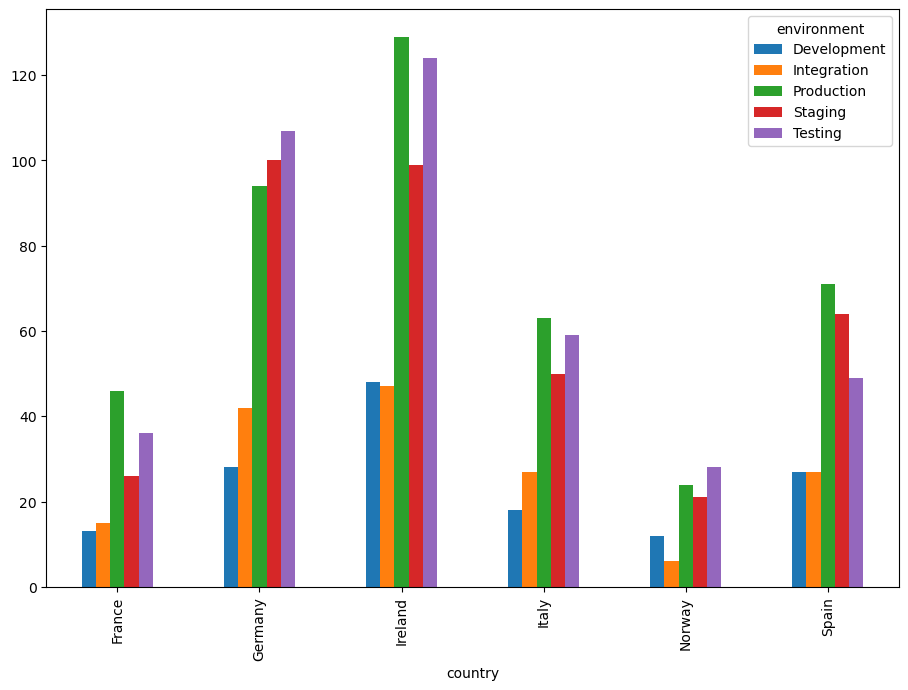

In [78]:
# Representamos gráficamente

h_env.unstack().plot(kind='bar')
plt.show()

###### 11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas.

● En la esquina superior izquierda debe aparecer un gráfico cuyo
título sea Type of OS grouped by country. Debe ser un gráfico de
barras horizontales que representen una agrupación (groupby) por
cada país (country) de los sistemas operativos (os) que tiene. Se
debe utilizar la función unstack y el plot debe ser de tipo barras
horizontales (barh).

● En la esquina superior derecha debe aparecer un gráfico cuyo
título sea Total Operating Systems. Debe representar la cantidad
total de sistemas operativos (os) que hay en el DataFrame. Se
debe utilizar la función groupby y el gráfico debe ser de tipo tarta
(pie). Como etiquetas (labels) debe mostrar el número de
sistemas operativos de cada tipo, y además debe mostrarse una
leyenda (legend) en la esquina superior derecha en la que
aparezca para cada sistema operativo el porcentaje existente en
el DataFrame.

● En la esquina inferior izquierda debe aparecer un gráfico cuyo
título sea Total hosts by country. Debe ser un gráfico de barras horizontales que representen la cantidad total de hosts por cada
país, para ello se debe utilizar la función value_counts() sobre los
países (country) del DataFrame. El gráfico generado debe incluir
como etiqueta en el eje x el texto Number of hosts y como etiqueta
del eje y el texto Country. También se ha de incluir el número total
de hosts que tiene cada país a la derecha de cada barra
horizontal. Además, se ha de añadir como valor máximo del eje x
un número equivalente al número total de hosts+100, de este
modo se verá un pequeño margen a la derecha que hará que se
visualice un poco mejor. Opcionalmente (si se hace puntuará) se
puede añadir con la librería seaborn una paleta de colores
(color_palette) que podemos utilizar para darle un color
degradado a las barras.

● En la esquina inferior derecha debe aparecer un gráfico cuyo
título sea Hosts by country grouped by enviroment. Debe
representar una agrupación (groupby) de hosts que hay por cada
país (country) y entorno (enviroment). Se debe utilizar la función
unstack(0) y el plot debe ser de tipo barras (bar). Como etiqueta
del eje y se debe añadir el texto Number of hosts.
Finalmente se deben ajustar los márgenes y espacios entre los
gráficos (fig.tight_layout()).

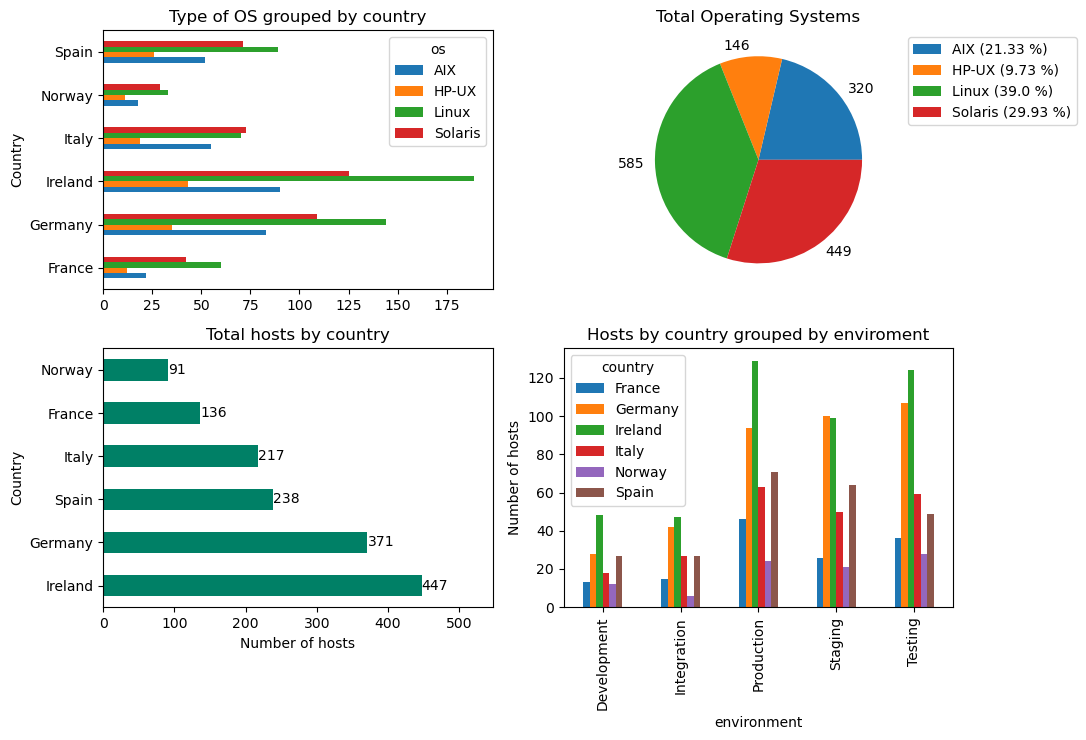

In [79]:
# CREAMOS ESPACIO DE GRÁFICOS 2 X 2

fig, axes = plt.subplots(nrows=2, ncols=2)                         

# axes marca posición gráficos: 0,0   0,1
                           #   1,0   0,1

h = hosts_df  

##### GRÁFICO 1
h1 = h.groupby([h['country'], 'os']).size()             # serie agrupada por país y os

graf1 = h1.unstack().plot(kind='barh', ax=axes[0,0])    # unstack convierte la serie en df +  representamos gráficamente
graf1.title.set_text('Type of OS grouped by country')
graf1.set_ylabel('Country')


##### GRÁFICO 2
h2 = h.groupby([h['os']]).size()                                # serie agrupada por os

graf2 = h2.plot(kind = 'pie', ax=axes[0,1], labels = h2)
graf2.title.set_text('Total Operating Systems')

h2_df = pd.DataFrame(h2)                                        # convierto en df
h2_df['Proporcion'] = round((h2_df/ h2_df.sum())*100, 2)        # añadimos columna cálculo proporciones al df agrupado por os
h2_df['Proporcion'] = h2_df['Proporcion'].astype('str')           
h2_df['OS']= h2_df.index.astype('str')                          # creo una copia del index como str porque lo necesito concatenar
h2_df['Proporcion'] = h2_df['OS'] + ' (' + h2_df['Proporcion'] + ' %)'

graf2.set_ylabel(' ')                                           # quito la etiqueta del eje y que se genera automáticamente
graf2.legend(h2_df['Proporcion'], bbox_to_anchor=(1.05, 1))     # bbox to anchor para poner la leyenda a la derecha del gráfico


##### GRÁFICO 3
h3 = h['country']                         # serie que contiene solo country            
h3_df = pd.DataFrame(h3.value_counts())   # contamos el nº de veces que aparece cada country en la serie y hacemos df

graf3 = h3_df.plot(kind='barh', ax=axes[1,0], colormap = 'summer')                                  
graf3.title.set_text('Total hosts by country')
graf3.set_xlabel('Number of hosts')
graf3.set_ylabel('Country')
graf3.get_legend().remove()                            # quito la leyenda que se genera automáticamente
graf3.set_xlim([0, (max(h3.value_counts())+ 100)])     # ponemos como límite del eje x el máximo de hostnames por país + 100 para mejor visualización

# Añadir el valor al lado de cada barra
i = 0
xoffset = 0.1                              # ajustar el texto de las etiquetas

for v in h3.value_counts():                # cogemos esto en vez de el df porque si no, intenta concatenar el i(float)+ country(str)
    graf3.text(y=i, x=v + xoffset, s=v, ha='left', va='center') 
    i += 1

    
##### GRÁFICO 4
h4 = h.groupby([h['country'], 'environment']).size()       # serie agrupada por country y environment
graf4 = h4.unstack(0).plot(kind = 'bar', ax=axes[1,1])     # unstack lo convierte en df + representamos graficamente
graf4.title.set_text('Hosts by country grouped by enviroment')
graf4.set_ylabel('Number of hosts')


##### AJUSTES FINALES DE TAMAÑO 
plt.rcParams["figure.figsize"] = (11,7.5)         # establecemos el tamaño de cada gráfico (más grandes que antes)
fig.tight_layout()                                # autocorregir espacios entre gráficos para que se vea presentable

plt.show()
